In [5]:
# Import the modules
from pathlib import Path

# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# suppress warnings
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
path = "Resources/lending_data.csv"
df = pd.read_csv(path)

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [6]:
# Separate the data into labels and features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']


In [4]:
# Review the y variable Series
# YOUR CODE HERE!

In [5]:
# Review the X variable DataFrame
# YOUR CODE HERE!

### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [9]:
# Scaling The Data
df_sub = df.loc[:, features]
scaler = StandardScaler()
scaler.fit(df_sub)
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()



,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


In [12]:
# Import the train_test_learn module

# Split the data using train_test_split
# Assign a random_state of 1 to the function

X = df_scaled
y = df.loan_status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [15]:
##Creating a function to choose the best classification model
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[59683   345]
 [   37  1963]]
    
    AUC: 0.9945013368761246

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.98      0.91      2000

    accuracy                           0.99     62028
   macro avg       0.92      0.99      0.95     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [   14   486]]
    
    AUC: 0.9964888059701493

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.88      0.97      0.93       500

    accuracy                           0.99     15508
   macro avg       0.94      0.98      0.96     15508
weighted avg       1.00      0.99      1.00     15508

    


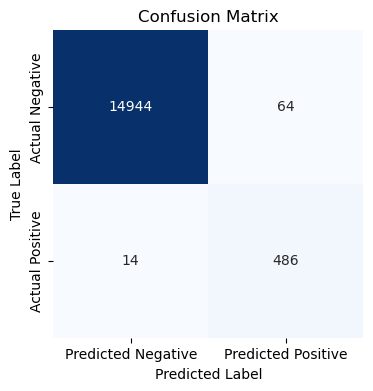

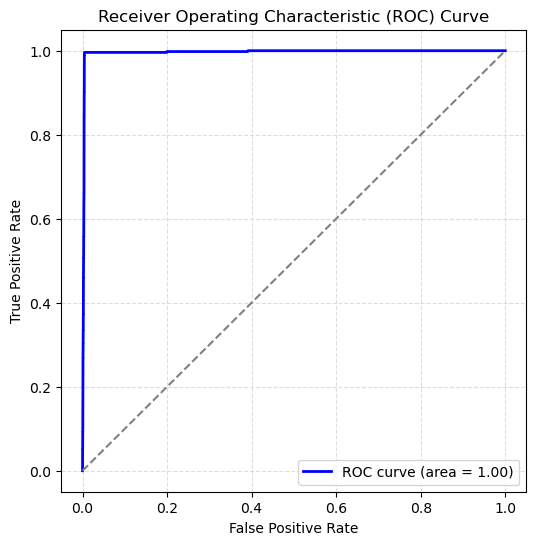

In [14]:
##Linear Regression
lr = LogisticRegression()

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59962    66]
 [  107  1893]]
    
    AUC: 0.9998424360298528

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     60028
           1       0.97      0.95      0.96      2000

    accuracy                           1.00     62028
   macro avg       0.98      0.97      0.98     62028
weighted avg       1.00      1.00      1.00     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14958    50]
 [  108   392]]
    
    AUC: 0.9327723214285716

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     15008
           1       0.89      0.78      0.83       500

    accuracy                           0.99     15508
   macro avg       0.94      0.89      0.91     15508
weighted avg       0.99      0.99      0.99     15508

    


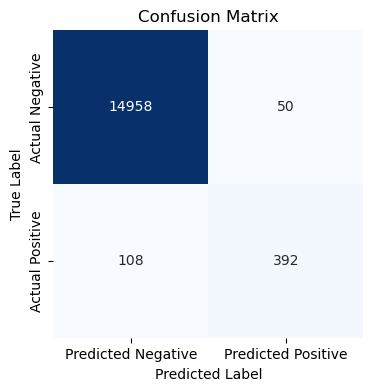

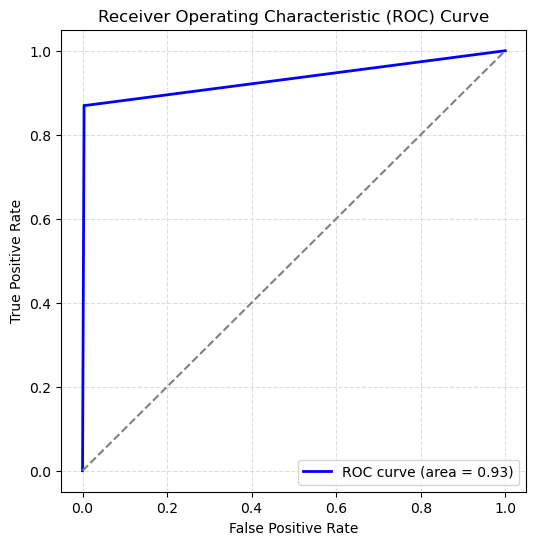

In [16]:
# Decision Trees
dt = DecisionTreeClassifier(random_state=42)

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59887   141]
 [   32  1968]]
    
    AUC: 0.9998037165989205

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     60028
           1       0.93      0.98      0.96      2000

    accuracy                           1.00     62028
   macro avg       0.97      0.99      0.98     62028
weighted avg       1.00      1.00      1.00     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14957    51]
 [   74   426]]
    
    AUC: 0.9959610207889126

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.85      0.87       500

    accuracy                           0.99     15508
   macro avg       0.94      0.92      0.93     15508
weighted avg       0.99      0.99      0.99     15508

    


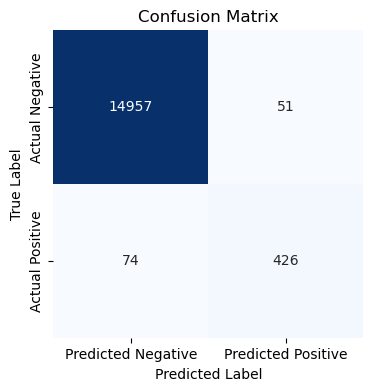

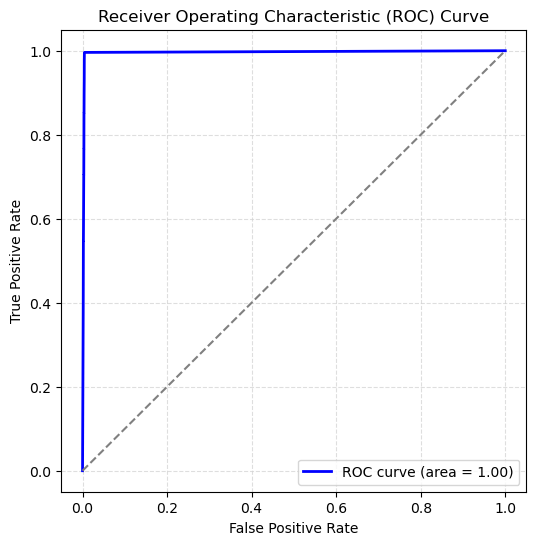

In [17]:
# Random Forest
rf = RandomForestClassifier(random_state=42)

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59674   354]
 [   12  1988]]
    
    AUC: 0.9957743261477977

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.92      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    3   497]]
    
    AUC: 0.9950055970149254

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.94       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


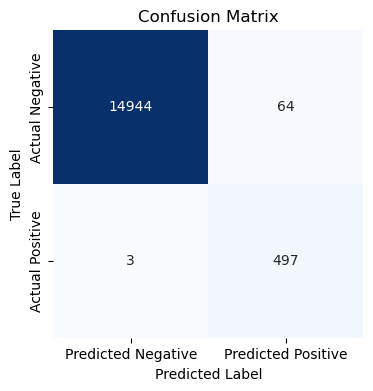

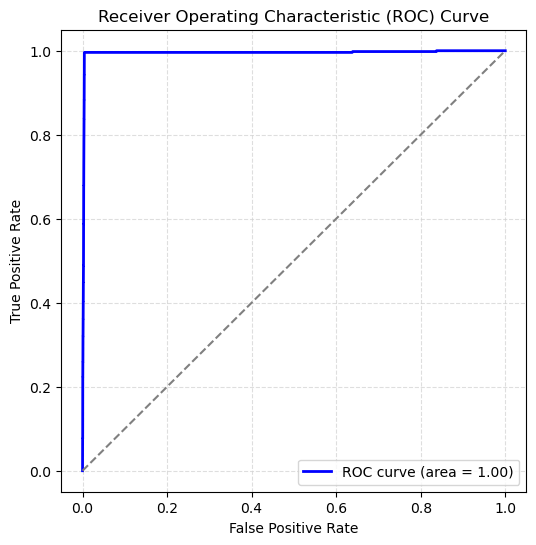

In [18]:
# SVC
svc = SVC(probability=True)

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59676   352]
 [   15  1985]]
    
    AUC: 0.9976630697341241

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.92      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    5   495]]
    
    AUC: 0.9959005197228145

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.93       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


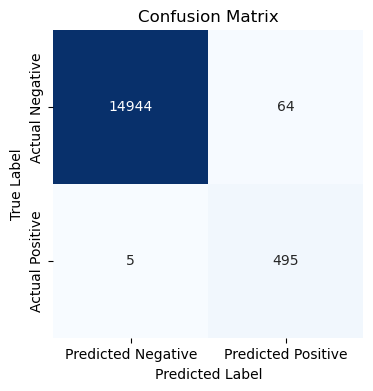

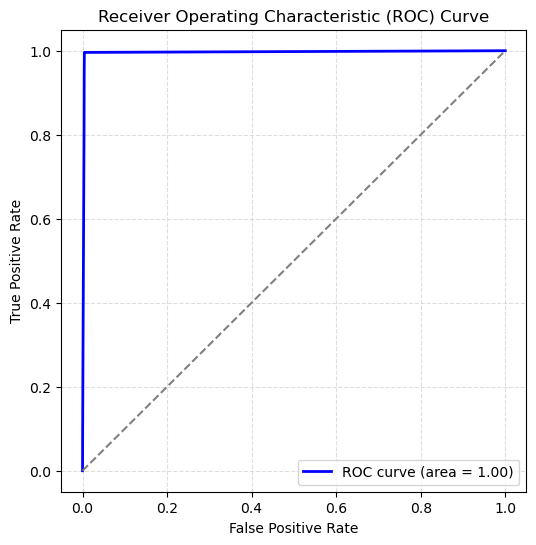

In [19]:
# KN Neighbors
knn = KNeighborsClassifier(n_neighbors=15)

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59962    66]
 [  107  1893]]
    
    AUC: 0.9998424360298528

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     60028
           1       0.97      0.95      0.96      2000

    accuracy                           1.00     62028
   macro avg       0.98      0.97      0.98     62028
weighted avg       1.00      1.00      1.00     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14957    51]
 [   96   404]]
    
    AUC: 0.9618150319829424

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      1.00     15008
           1       0.89      0.81      0.85       500

    accuracy                           0.99     15508
   macro avg       0.94      0.90      0.92     15508
weighted avg       0.99      0.99      0.99     15508

    


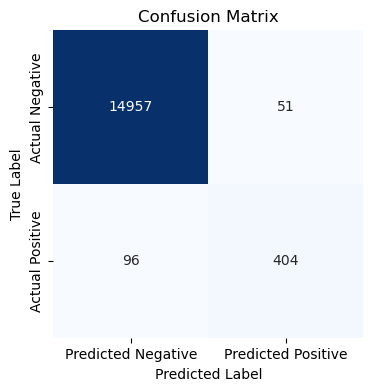

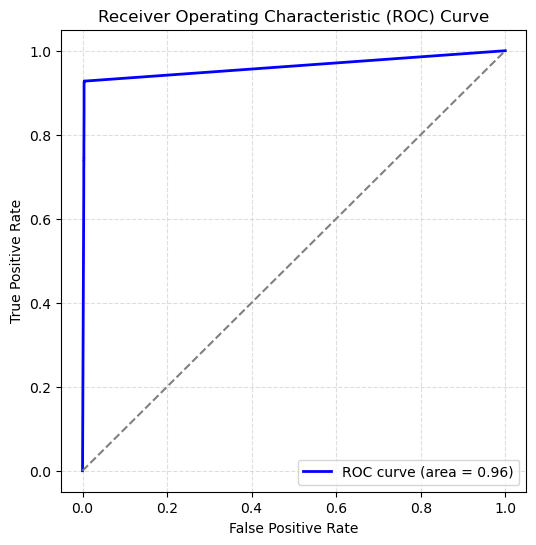

In [20]:
# Extra Trees
et = ExtraTreesClassifier(random_state=42)

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59679   349]
 [   15  1985]]
    
    AUC: 0.9970335010328513

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.93      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    5   495]]
    
    AUC: 0.9964430970149254

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.93       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


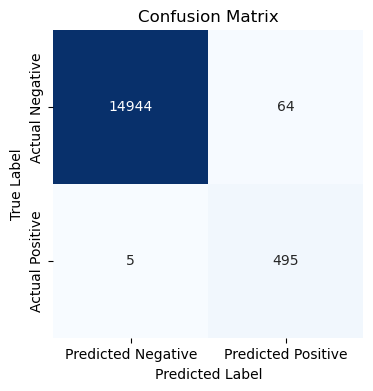

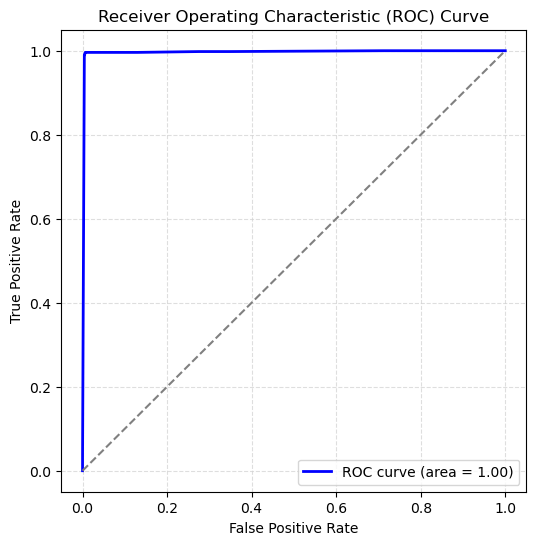

In [21]:
# Ada Boost
ada = AdaBoostClassifier(random_state=42)

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59691   337]
 [   11  1989]]
    
    AUC: 0.9984022372892651

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.86      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.93      0.99      0.96     62028
weighted avg       1.00      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    7   493]]
    
    AUC: 0.9953318230277186

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.93       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


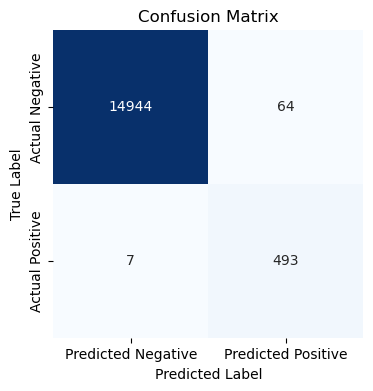

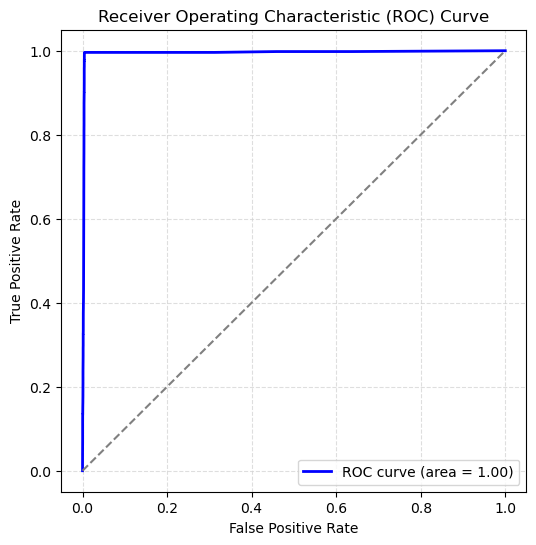

In [22]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59679   349]
 [   14  1986]]
    
    AUC: 0.9977960535083629

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.93      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    4   496]]
    
    AUC: 0.995082289445629

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.94       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


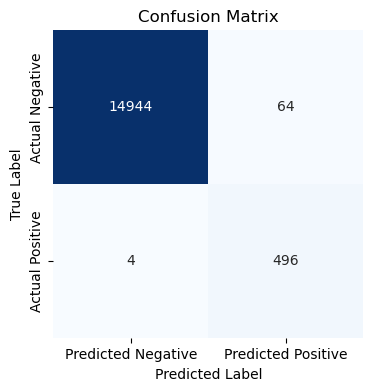

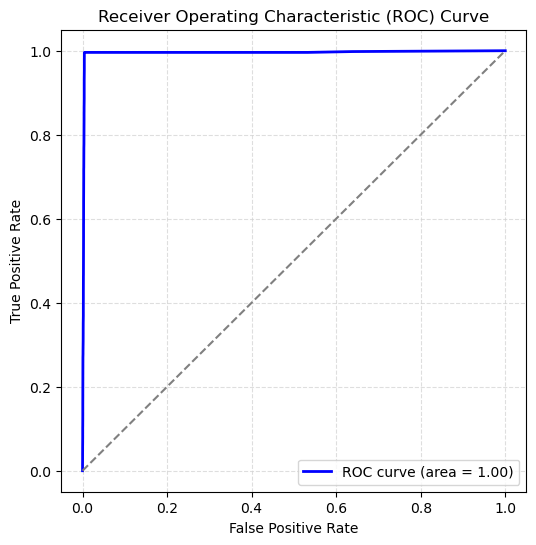

In [23]:
# XGB 
xgb = XGBClassifier(random_state=42)

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[59678   350]
 [   14  1986]]
    
    AUC: 0.9981024563537017

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.92      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    4   496]]
    
    AUC: 0.9958292910447761

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.94       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


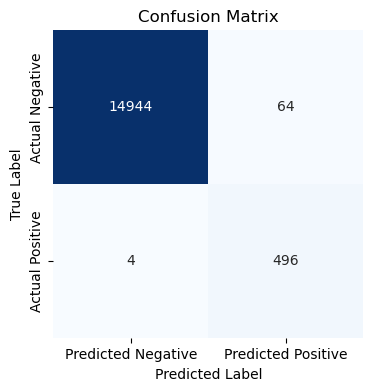

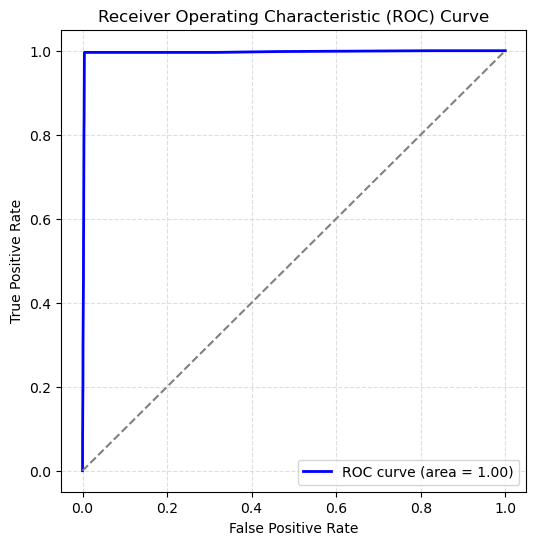

In [24]:
# LGBM
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
# YOUR CODE HERE!

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [11]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!

In [12]:
# Print the classification report for the model
# YOUR CODE HERE!

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** Overall, the logistic regression does a pretty decent job at predicting healthy and high rick loans. However, after looping different classification models, we can see the the SVC model performed a bit better in comparrision. Looking at the confusion matrix we can see that the predicted number of false positive are the same, but the number of false negatives are a bit less.

---